In [1]:
import matplotlib, sys,  os
os.environ['OPENBLAS_NUM_THREADS'] = '1'
os.environ['OMP_NUM_THREADS'] = '1'
os.environ['MKL_NUM_THREADS'] = '1'
os.environ['NUMEXPR_NUM_THREADS'] = '1'
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
sys.path.append("./mylib/")

import numpy as np
matplotlib.use('Agg')
import matplotlib.pyplot as plt

# np.seterr(all="ignore")
from threeML import *
from WCDA_hal import HAL, HealpixConeROI, HealpixMapROI
import traceback

# import warnings
# warnings.simplefilter("ignore")
from threeML import silence_progress_bars, activate_progress_bars, toggle_progress_bars
from threeML.utils.progress_bar import trange

from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy import units as u
# from astropy.visualization import astropy_mpl_style, imshAow_norm
from astropy.coordinates import Angle

import healpy as hp

from tqdm import tqdm

# from mylib import *
import mylib as my
from importlib import reload

Welcome to JupyROOT 6.24/06


18:25:30 WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=368458;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=912612;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#71\71]8;;\
                  will not be available.                                                                           

/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


18:25:30 INFO      Starting 3ML!                                                                     ]8;id=86524;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=121446;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#35\35]8;;\

         WARNING   WARNINGs here are NOT errors                                                      ]8;id=161776;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=471776;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#36\36]8;;\

         WARNING   but are inform you about optional packages that can be installed                  ]8;id=386383;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=900881;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#37\37]8;;\

         WARNING    to disable these messages, turn off start_warning in your config file            ]8;id=339066;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=675450;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#40\40]8;;\

18:25:31 WARNING   The cthreeML package is not installed. You will not be able to use plugins which  ]8;id=476883;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=53931;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#94\94]8;;\
                  require the C/C++ interface (currently HAWC)                                                     

         WARNING   Could not import plugin FermiLATLike.py. Do you have the relative instrument     ]8;id=937377;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=799678;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

         WARNING   Could not import plugin HAWCLike.py. Do you have the relative instrument         ]8;id=751172;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py\__init__.py]8;;\:]8;id=938418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/__init__.py#144\144]8;;\
                  software installed and configured?                                                               

18:25:31 WARNING   No fermitools installed                                              ]8;id=745243;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py\lat_transient_builder.py]8;;\:]8;id=688562;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/threeML/utils/data_builders/fermi/lat_transient_builder.py#44\44]8;;\

Load Mymap:  11%|█         | 4/37 [00:00<00:00, 336.57it/s]     
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.

Load Myfit:  14%|█▎        | 5/37 [00:00<00:00, 73.82it/s] 
WARNING RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96, got 80


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 232, got 216

ReLoad Mycatalog:  59%|█████▉    | 22/37 [00:00<00:00, 42.00it/s] 
WARNING VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.

Load sub from Myspeedup: 100%|██████████| 37/37 [00:00<00:00, 42.00it/s]   

Yourlib init successfully!!!


1. psf fast 0.1
2. + 88

Best fit values:

,result,unit
parameter,,
J2002P3244u.spectrum.main.Powerlaw.K,(4.500 +/- 0.009) x 10^-26,1 / (keV s cm2)
J2002P3244u.spectrum.main.Powerlaw.index,-1.3 +/- 0.5,
J2005P3415.spectrum.main.Powerlaw.K,(7.8 +/- 0.5) x 10^-26,1 / (keV s cm2)
J2005P3415.spectrum.main.Powerlaw.index,-3.54 +/- 0.11,
J2005P3050.spectrum.main.Powerlaw.K,(9.6 -1.7 +2.0) x 10^-26,1 / (keV s cm2)
J2005P3050.spectrum.main.Powerlaw.index,-4.0 +/- 0.7,
J2018P3643u.spectrum.main.Powerlaw.K,(3.89 +/- 0.09) x 10^-25,1 / (keV s cm2)
J2018P3643u.spectrum.main.Powerlaw.index,-3.44 +/- 0.04,
J2020P4034.spectrum.main.Powerlaw.K,(4.14 -0.31 +0.34) x 10^-26,1 / (keV s cm2)


Correlation matrix:

1.00,0.01,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
0.01,1.00,-0.01,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,-0.01,-0.01
0.00,-0.01,1.00,0.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,-0.08,0.05
-0.00,-0.02,0.39,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,-0.05,0.01
0.00,0.00,0.00,0.00,1.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00
0.00,0.00,0.00,0.00,0.01,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00
-0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.38,0.00,0.00,-0.41,-0.03,0.02,-0.00,-0.01,0.00,0.00,0.00,0.00,0.00,-0.03,0.02
-0.00,0.00,0.00,0.00,0.00,0.00,0.38,1.00,0.00,0.00,-0.04,-0.29,-0.00,0.01,0.00,-0.01,0.00,0.00,0.00,0.00,-0.01,0.01
-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.40,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,-0.05,0.03
-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,1.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,-0.02,0.01
-0.00,0.00,0.00,0.00,0.00,0.00,-0.41,-0.04,0.00,0.00,1.00,0.21,-0.05,0.01,-0.01,0.00,0.00,0.00,0.00,0.00,-0.01,0.01


Values of -log(likelihood) at the minimum:

,-log(likelihood)
KM2A,10377.081768
total,10377.081768


Values of statistical measures:

,statistical measures
AIC,20798.16591
BIC,21039.34875


Smoothing planes:   0%|          | 0/7 [00:00<?, ?it/s]

Failed to generate proper kernel normalization: got _kernel.sum() = 0.989447; expected 1.0+-0.01.


21:53:44 INFO      Considering 5 dec bins for extended source J2005P3415            ]8;id=138907;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=826353;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 33.870                      ]8;id=938944;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=390581;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J2005P3050            ]8;id=681404;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=852376;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 30.850                      ]8;id=463418;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=84391;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J2018P3643u           ]8;id=583005;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=423160;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 36.720                      ]8;id=474402;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=126049;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J2020P3649u           ]8;id=992154;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=161360;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 36.820                      ]8;id=716880;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=561965;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 5 dec bins for extended source J2027P3657            ]8;id=22735;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=625281;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 36.950                      ]8;id=167062;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=788163;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 14 dec bins for extended source J2028P3352           ]8;id=483541;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=673415;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 33.880                      ]8;id=983551;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=941299;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 4 dec bins for extended source J2031P4127u           ]8;id=120148;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=833845;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 41.460                      ]8;id=918956;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=184854;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\

         INFO      Considering 17 dec bins for extended source Diffuse              ]8;id=866775;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=864250;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#93\93]8;;\

         INFO      Central bin is bin at Declination = 35.887                      ]8;id=636369;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py\convolved_extended_source.py]8;;\:]8;id=62826;file:///data/home/cwy/.mylib/miniconda3/envs/3ML/lib/python3.9/site-packages/WCDA_hal/convolved_source/convolved_extended_source.py#102\102]8;;\


WARNING RuntimeWarning: invalid value encountered in sqrt



(307.177734375, 40.08176916940402)


<Figure size 640x480 with 0 Axes>

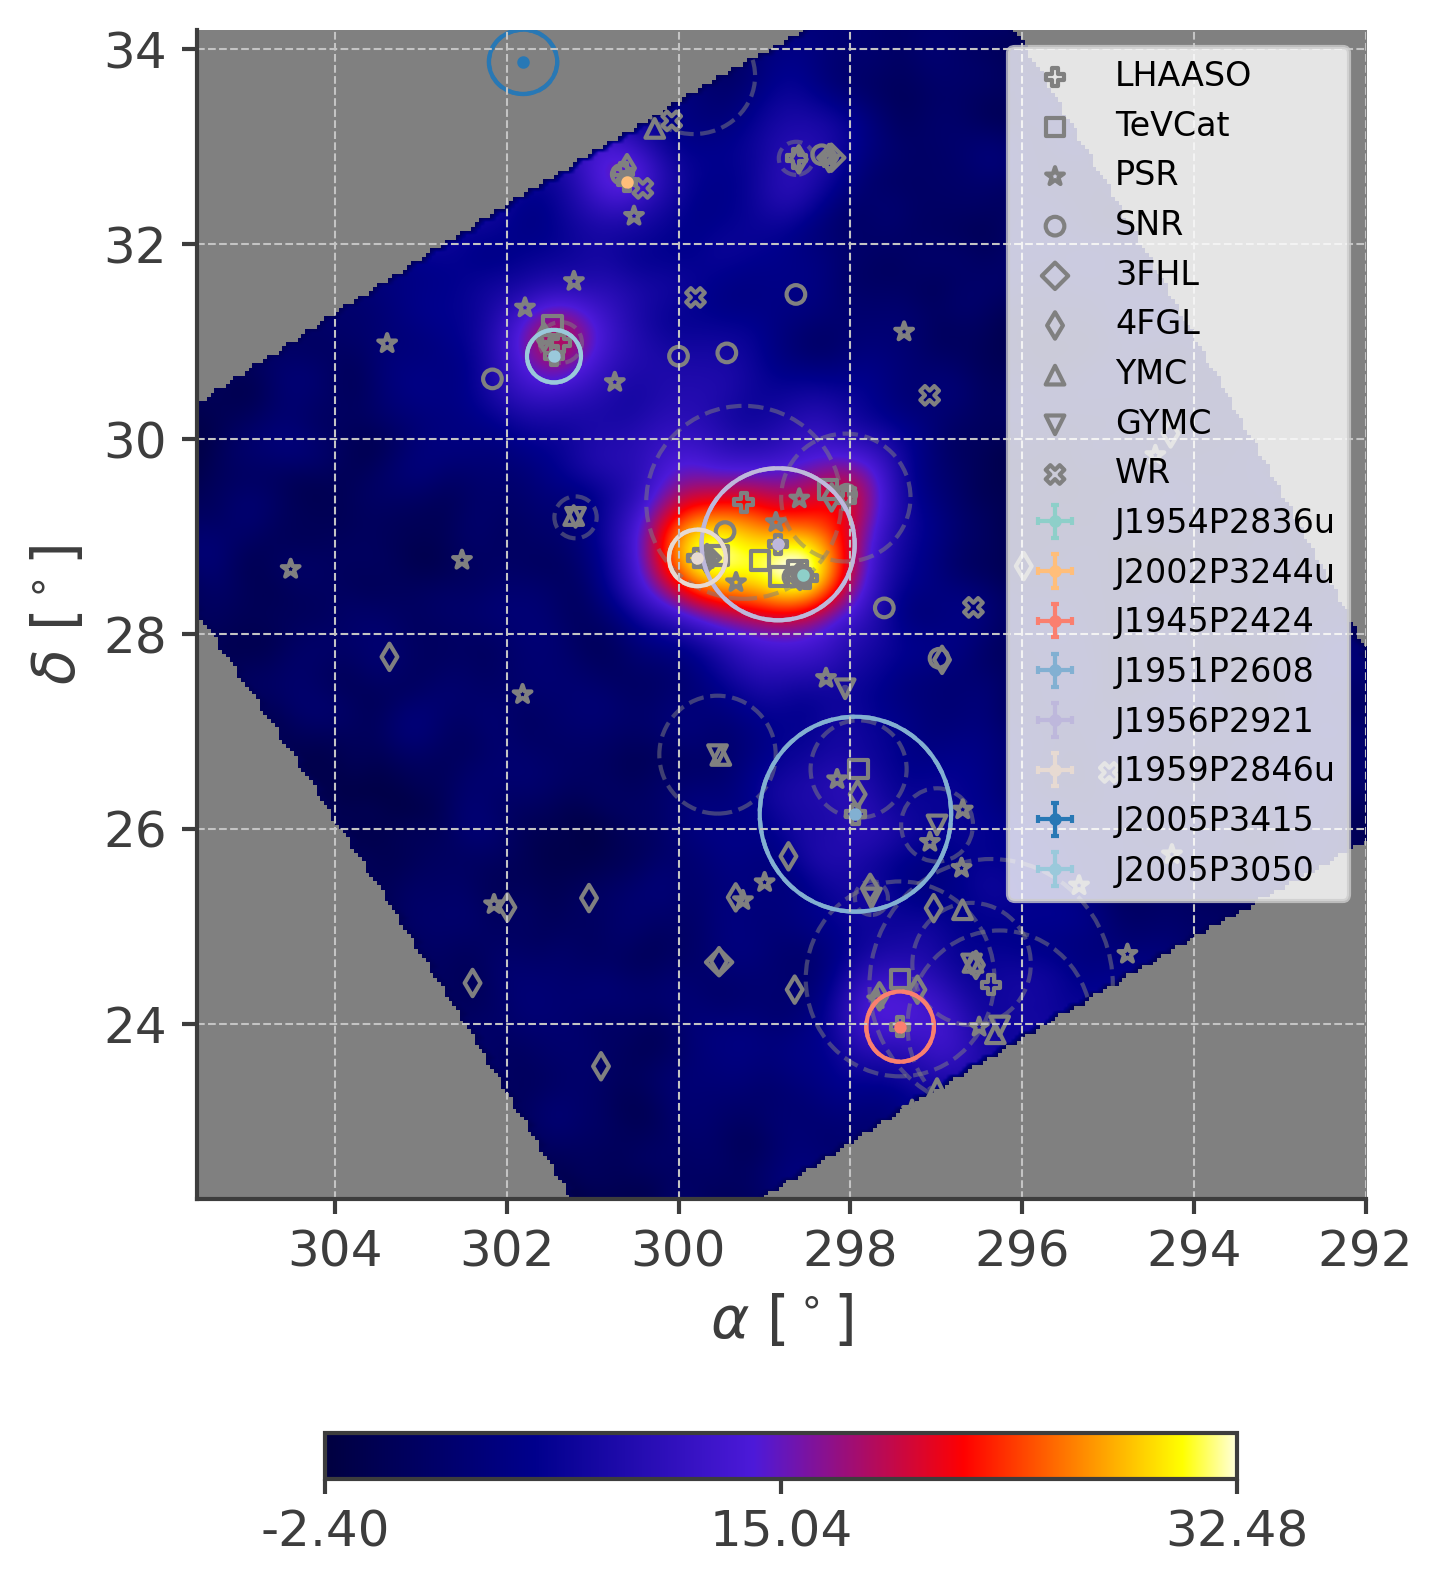

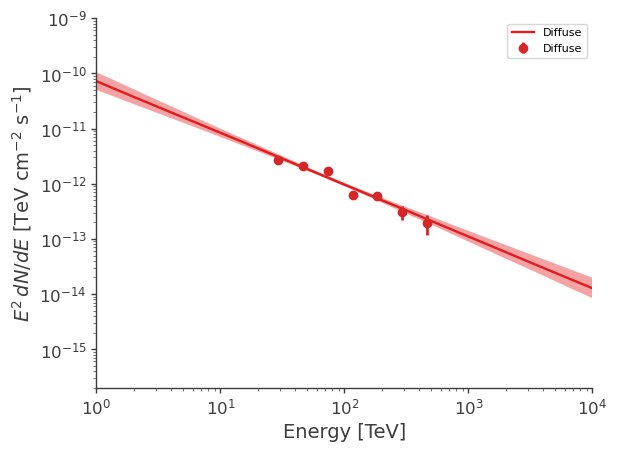

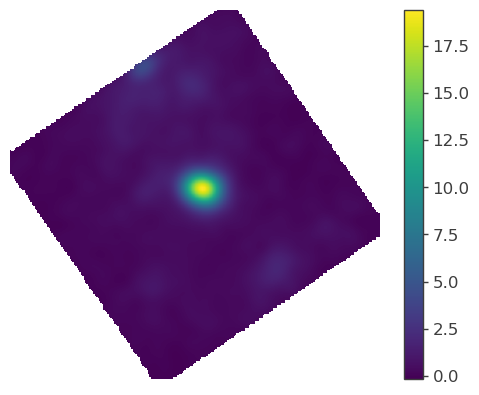

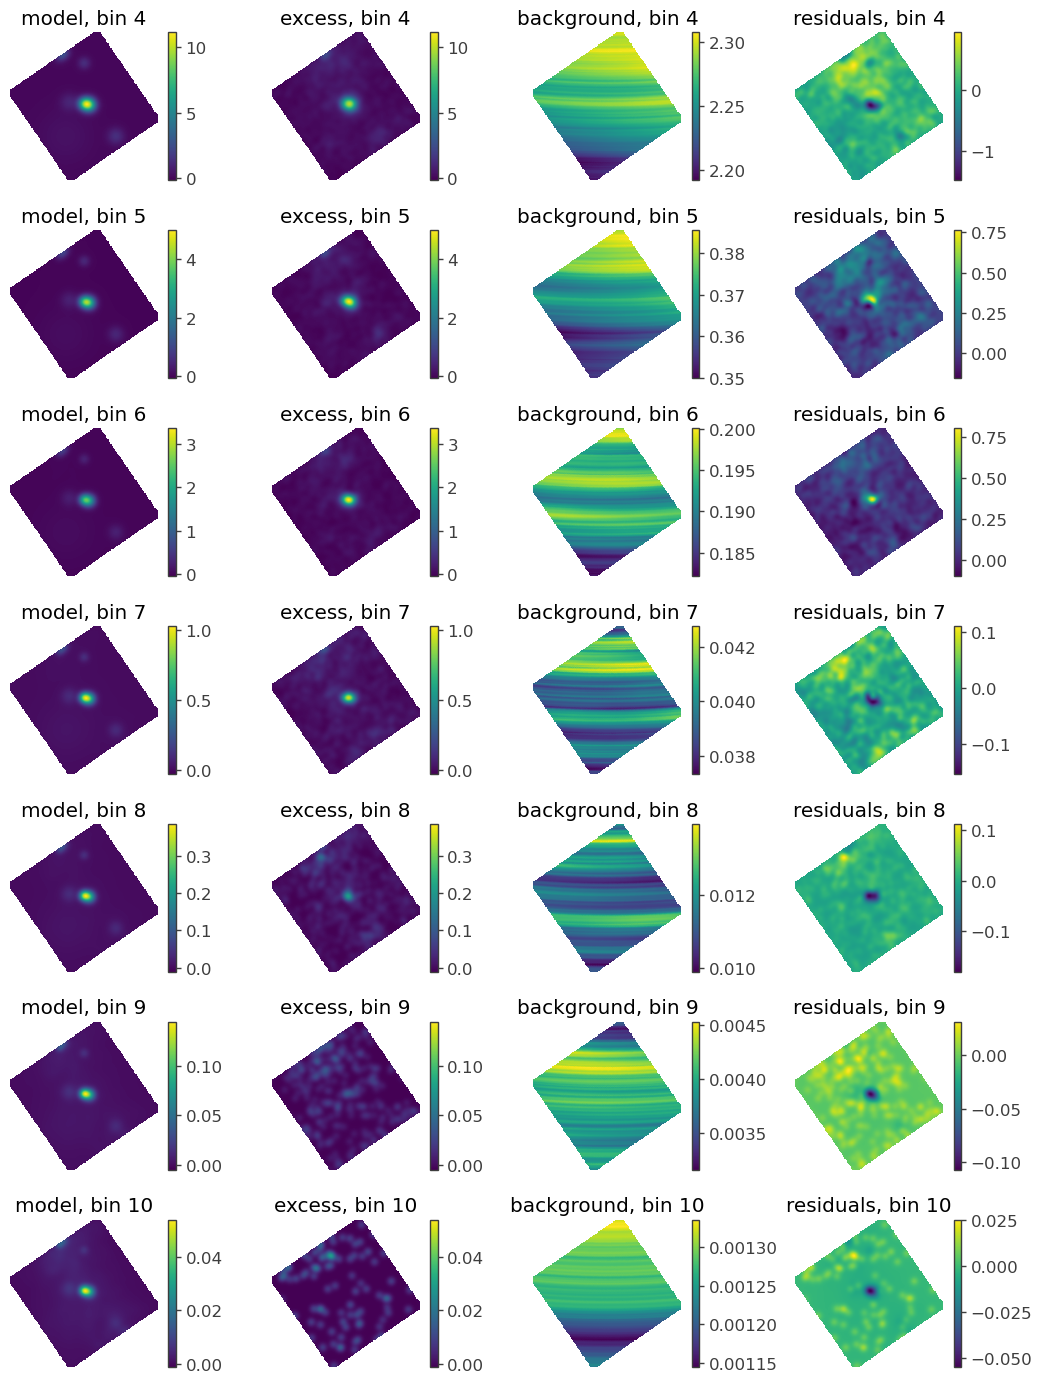

<Figure size 640x480 with 0 Axes>

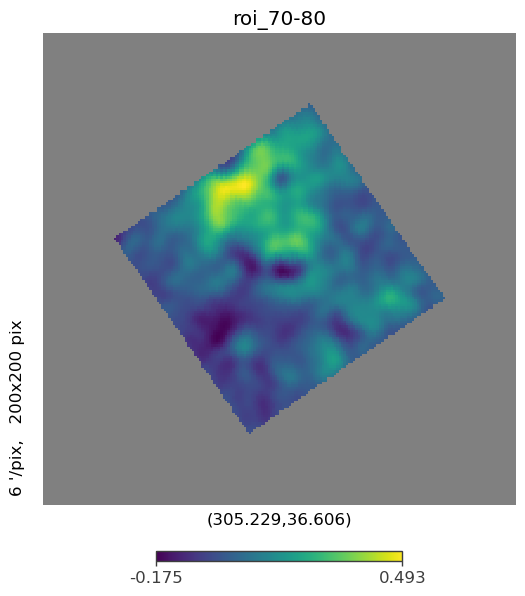

LHAASO:  1 298.63 32.88 1LHAASO J1954+3253  0.17
LHAASO:  2 300.64 32.74 1LHAASO J2002+3244u  0.0
LHAASO:  3 300.6 32.64 1LHAASO J2002+3244u   0.0
LHAASO:  4 301.3 34.25 1LHAASO J2005+3415*  0.74
LHAASO:  5 301.81 33.87 1LHAASO J2005+3415*   0.33
LHAASO:  6 301.45 30.85  1LHAASO J2005+3050  0.27
LHAASO:  7 301.37 30.99  1LHAASO J2005+3050   0.21
LHAASO:  8 304.65 36.72  1LHAASO J2018+3643u  0.24
LHAASO:  9 304.61 36.75  1LHAASO J2018+3643u   0.26
LHAASO:  10 305.03 40.57 1LHAASO J2020+4034  0.38
LHAASO:  11 305.2 40.43 1LHAASO J2020+4034   0.0
LHAASO:  12 305.14 36.63 1LHAASO J2020+3638  1.27
LHAASO:  13 305.23 36.82  1WCDA J2020+3649u  0.12
LHAASO:  14 305.25 36.91  1LHAASO J2020+3649u   0.15
LHAASO:  15 306.88 36.95  1LHAASO J2027+3657  0.38
LHAASO:  16 306.88 36.95  1KM2A J2027+3657  0
LHAASO:  17 307.21 33.88  1LHAASO J2028+3352  1.7
LHAASO:  18 307.21 33.88  1KM2A J2028+3352  0
LHAASO:  19 307.9 40.88 1LHAASO J2031+4052u*  0.25
LHAASO:  20 308.14 40.88 1LHAASO J2031+4052u*   0.0
L

Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(2.91 +/- 0.14) x 10^-24,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,2128.065528
total,2128.065528


Values of statistical measures:

,statistical measures
AIC,4258.131065
BIC,4269.094020


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.74 +/- 0.08) x 10^-24,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,1924.926811
total,1924.926811


Values of statistical measures:

,statistical measures
AIC,3851.853631
BIC,3862.816586


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(9.3 +/- 0.5) x 10^-25,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,1806.612824
total,1806.612824


Values of statistical measures:

,statistical measures
AIC,3615.225658
BIC,3626.188613


Failed to generate proper kernel normalization: got _kernel.sum() = 0.989737; expected 1.0+-0.01.


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(4.71 +/- 0.34) x 10^-25,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,1537.901838
total,1537.901838


Values of statistical measures:

,statistical measures
AIC,3077.803685
BIC,3088.766640


Failed to generate proper kernel normalization: got _kernel.sum() = 0.989737; expected 1.0+-0.01.
Failed to generate proper kernel normalization: got _kernel.sum() = 0.989737; expected 1.0+-0.01.


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(2.60 +/- 0.25) x 10^-25,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,1072.412831
total,1072.412831


Values of statistical measures:

,statistical measures
AIC,2146.825671
BIC,2157.788626


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(1.56 +/- 0.21) x 10^-25,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,646.042591
total,646.042591


Values of statistical measures:

,statistical measures
AIC,1294.085192
BIC,1305.048147


Best fit values:

,result,unit
parameter,,
Diffuse.spectrum.main.PowerlawM.K,(7.4 +/- 1.6) x 10^-26,1 / (keV s cm2)


Correlation matrix:

1.00


Values of -log(likelihood) at the minimum:

,-log(likelihood)
WCDA,319.842947
total,319.842947


Values of statistical measures:

,statistical measures
AIC,641.685902
BIC,652.648857



100%|██████████| 7/7 [00:47<00:00,  6.82s/it]


processing MLE analyses:   0%|          | 0/1 [00:00<?, ?it/s]

Propagating errors:   0%|          | 0/30 [00:00<?, ?it/s]


WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.

 20%|██        | 7/35 [48:29<3:13:57, 415.62s/it]


IndexError: index 140 is out of bounds for axis 0 with size 140

<Figure size 640x480 with 0 Axes>

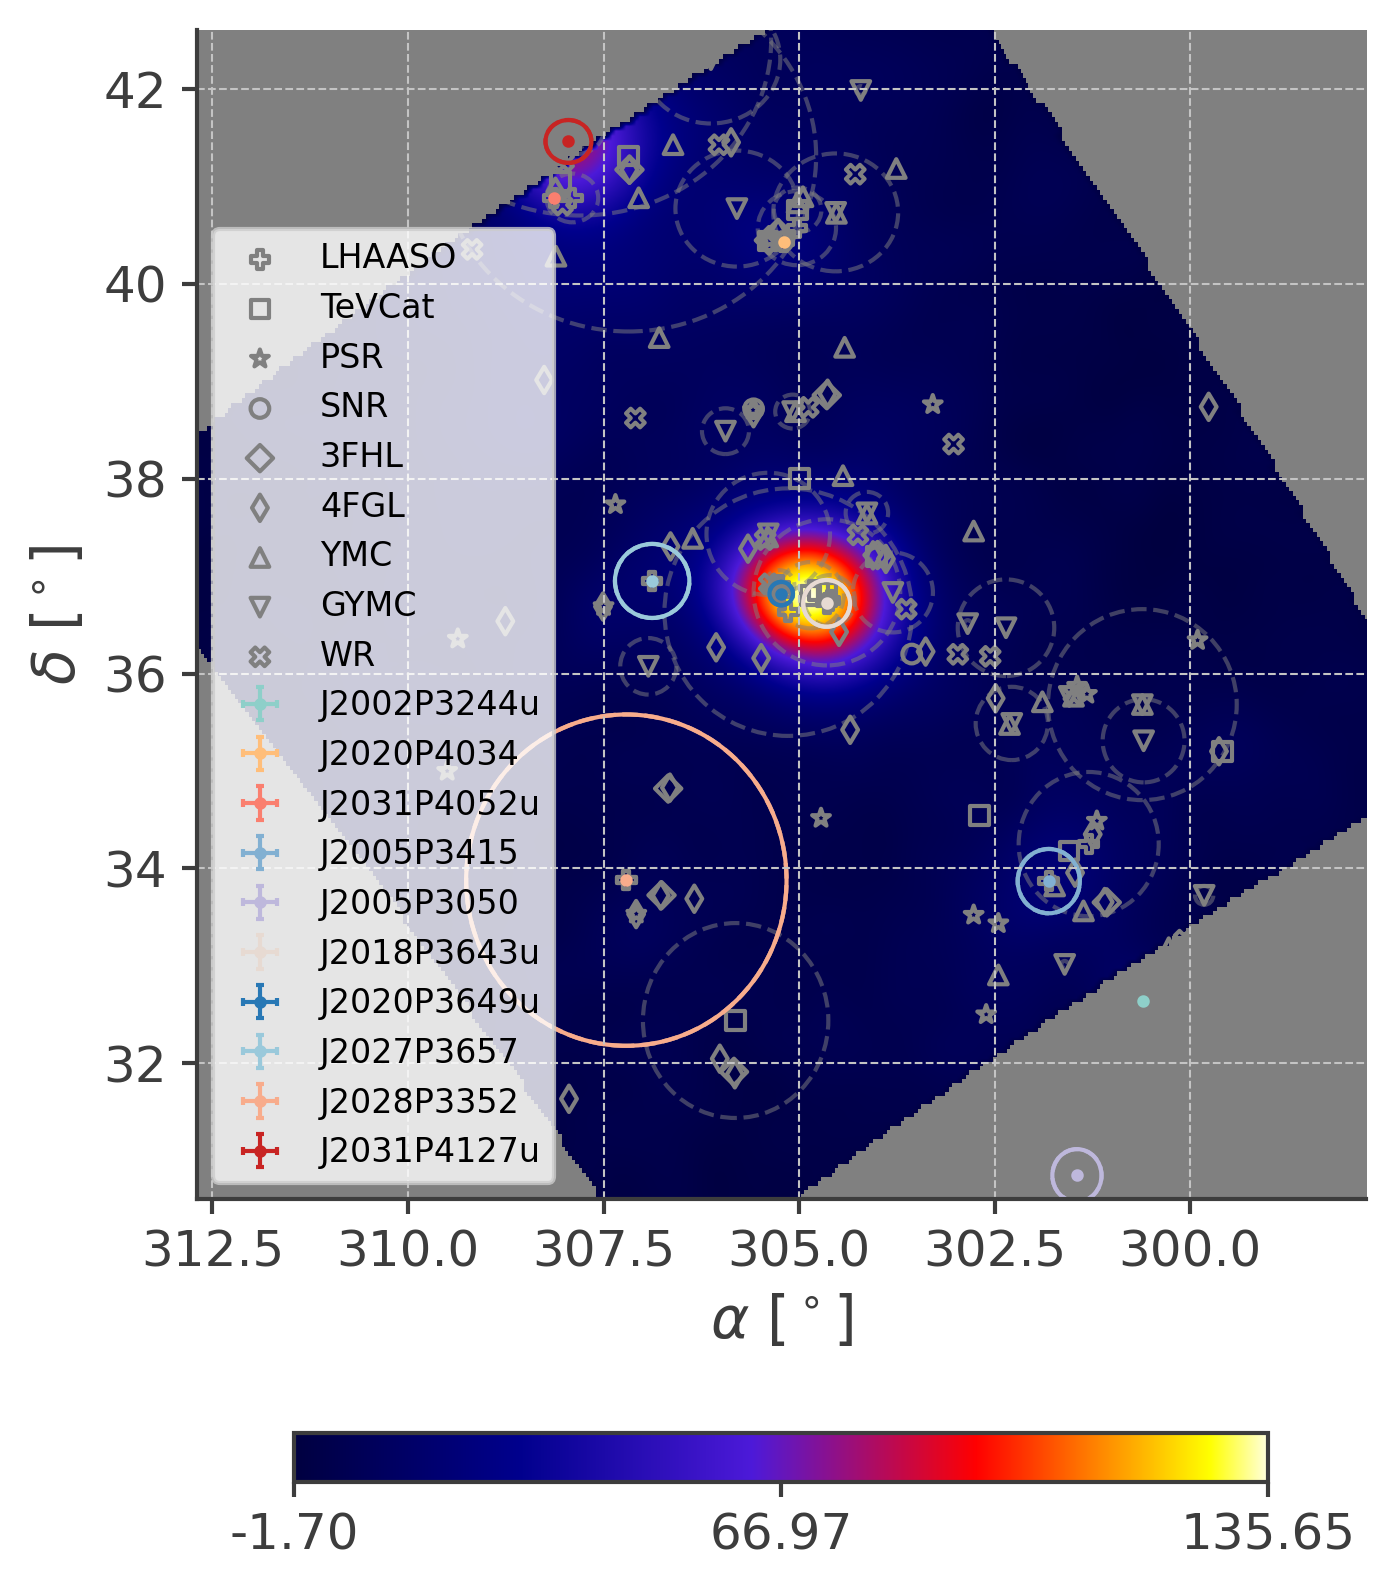

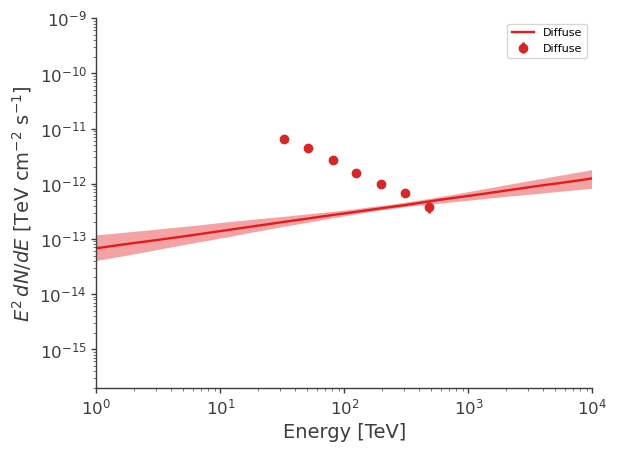

In [7]:
%matplotlib inline
#####   Data Initialize
silence_warnings()

maptree = "../../data/KM2A1234full_skymap_rcy.root"
# response = "../../data/KM2A1234full_mcpsf_DRfinal.root"
response = "../../data/KM2A1234full_mcpsfnewfix13.root"

region_name="Diffuse_KM2A_fprm"
if not os.path.exists(f'../res/{region_name}/'):
    os.system(f'mkdir ../res/{region_name}/')

nside=2**10
npix=hp.nside2npix(nside)
pixarea = 4 * np.pi/npix

pixIdx = hp.nside2npix(nside) # number of pixels I can get from this nside
pixIdx = np.arange(pixIdx) # pixel index numbers
new_lats = hp.pix2ang(nside, pixIdx)[0] # thetas I need to populate with interpolated theta values
new_lons = hp.pix2ang(nside, pixIdx)[1] # phis, same
c_icrs = SkyCoord(ra=new_lons*180/np.pi*u.degree, dec=90*u.degree-new_lats*180/np.pi*u.degree, frame='icrs')
c_l=c_icrs.galactic.l.deg
c_b=c_icrs.galactic.b.deg

resultsall = []
for i,gl in enumerate(tqdm(range(15,365,10))): #15
    c_gal = SkyCoord(l=(gl)*u.degree, b=0*u.degree, frame='galactic')
    RA_center=c_gal.icrs.ra.deg
    Dec_center=c_gal.icrs.dec.deg
    if (Dec_center<-20. or Dec_center>80.): continue
    signal=np.zeros(npix,dtype=np.float64)
    mask = ( (c_l< gl + 5) & (c_l > gl - 5) & (c_b <5.) & (c_b>-5) & (90-new_lats/np.pi*180>-20) & (90-new_lats/np.pi*180<80)) #&(new_lats<110/180*np.pi )  & (new_lats > 10/180*np.pi )
        
    signal[mask]=1
    ra1,dec1=RA_center, Dec_center

    data_radius = 6.0
    model_radius = 7.0

    roi = HealpixMapROI(ra=ra1,dec=dec1, data_radius=data_radius, model_radius=model_radius, roimap=signal)

    KM2A = HAL("KM2A", maptree, response, roi, flat_sky_pixels_size=0.1)

    #####   Data Situation
    %matplotlib inline
    KM2A.set_active_measurements(4, 13)
    KM2A.display()
    KM2A.psf_integration_method="fast"


    Modelname=f"roi_{gl - 5}-{gl + 5}"
    if not os.path.exists(f'../res/{region_name}/{Modelname}/'):
        os.system(f'mkdir ../res/{region_name}/{Modelname}/')
    fig = KM2A.display_stacked_image(smoothing_kernel_sigma=0.25)
    fig.savefig(f"../res/{region_name}/{Modelname}_counts_all.png",dpi=300)

    lm = my.getcatModel(ra1, dec1, data_radius, model_radius, rtsigma=5, rtflux=10, rtindex=10, rtp=5,  detector="KM2A", roi=roi, pf=True, sf=True,  mkf=False, mindexf=False, indexb=(-4,-1)) #, fixall=True,  , Kscale= 1e-25

    Diffuse, diffscaleratio = my.set_diffusebkg(
                ra1, dec1, 8, 8, Kf=False, indexf=False, piv=50, name=region_name, ifreturnratio=True, Kb=(1e-17, 1e-14), indexb=(-4, -1)
                ) # , , Kn=1e-25
    
    lm.add_source(Diffuse)

    lm.save(f"../res/{region_name}/{Modelname}/Model_init.yml", overwrite=True)
    lm.display(complete=True)

    result = my.fit(region_name, Modelname, KM2A, lm, 4, 10, mini="minuit") #, ifgeterror=True
    sources = my.get_sources(lm,result)
    resultsall.append([result, sources, diffscaleratio])

    resu = my.getressimple(KM2A, lm)
    new_source_idx = np.where(resu==np.ma.max(resu))[0][0]
    new_source_lon_lat=hp.pix2ang(1024,new_source_idx,lonlat=True)
    print(new_source_lon_lat)

    plt.figure()
    hp.gnomview(resu,norm='',rot=[ra1,dec1],xsize=200,ysize=200,reso=6,title=Modelname)
    plt.scatter(new_source_lon_lat[0],new_source_lon_lat[1],marker='x',color='red')
    plt.show()
    plt.savefig(f"../res/{region_name}/{Modelname}_res.png",dpi=300)

    map2, skymapHeader = hp.read_map("../../data/fullsky_KM2A_llh-3.5_new.fits.gz",h=True)
    map2 = my.maskroi(map2, roi)
    sources.pop("Diffuse")
    fig = my.drawmap(region_name, Modelname, sources, map2, ra1, dec1, rad=2*data_radius, contours=[10000],save=1, 
                    color="Fermi",
                    colors = my.colorall
                    )
    
    try:
        Flux_WCDA0, jls0  = my.getdatapoint(KM2A, lm, maptree, response, roi, "Diffuse", ifpowerlawM=1, piv=50)
        import matplotlib as mpl

        x_Max=10000.
        x_Min=1
        y_Min=0.2e-15
        y_Max=1e-9
        fig,ax = plt.subplots()
        plot_spectra(
            result[0].results,
            sources_to_use=["Diffuse"], #,"ext1","ext2","ext4","ext5","ext6","ext7"|
            include_extended=True,
            ene_min=x_Min,
            ene_max=x_Max,
            num_ene=30,
            energy_unit="TeV",
            flux_unit="TeV/(s cm2)",
            subplot=ax,
            )

        my.Draw_sepctrum_points(region_name, Modelname, Flux_WCDA0,"Diffuse","tab:red")

        ax.set_xlim(x_Min,x_Max)
        ax.set_ylim(y_Min,y_Max)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylabel(r"$E^2\,dN/dE$ [TeV cm$^{-2}$ s$^{-1}$]")
        ax.set_xlabel("Energy [TeV]")
        plt.legend()
        plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.png', dpi=300)
        plt.savefig(f'../res/{region_name}/{Modelname}/Spectrum.pdf')
    except:
        continue


In [4]:
gc = []
dk = []
de = []
di = []
die = []
den = []
dep = []
dien = []
diep = []
for i in range(len(resultsall)):
    gc.append(range(15,365,10)[i])
    dk.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["value"])
    de.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["error"])
    den.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["negative_error"]))
    dep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.K"]["positive_error"]))
    di.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["value"])
    die.append(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["error"])
    dien.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["negative_error"]))
    diep.append(abs(resultsall[i][0][1][0].loc["Diffuse.spectrum.main.Powerlaw.index"]["positive_error"]))
results=[gc,dk,de,den,dep,di,die,dien,diep]
np.save(f"../res/{region_name}/resultsall.npy",results)

In [ ]:
region_name="Diffuse_KM2A"
results = np.load(f"../res/{region_name}/resultsall2.npy")
gc=results[0]
dk=results[1]
den=results[3]
dep=results[4]
di = results[5]
die = results[6]
dien = results[7]
diep = results[8]

Text(0.5, 0, '$GLON^{o}$')

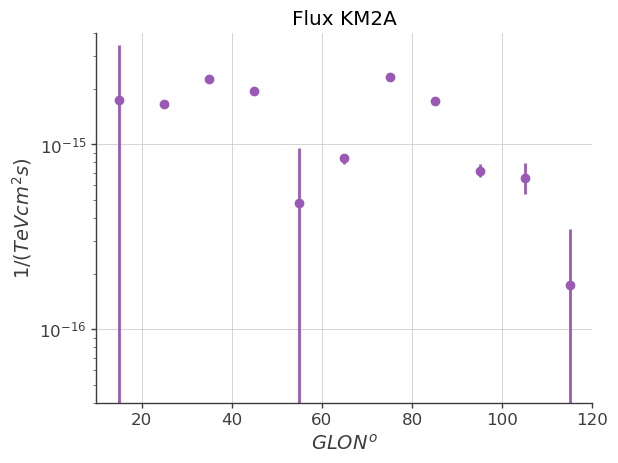

In [5]:
%matplotlib inline
plt.figure() #figsize=(10,10)
plt.errorbar(gc, np.array(dk)*1e9, [np.array(den)*1e9, np.array(dep)*1e9], fmt="o") #
plt.yscale("log")
plt.title("Flux KM2A")
plt.ylim(4e-17,4e-15)
plt.ylabel(r"$1/(TeV cm^{2} s)$")
plt.grid()
plt.xlabel(r"$GLON^{o}$")
# my.drawDig("/data/home/cwy/Science/3MLWCDA/data/km2adiffusepaper.csv", fixx=1, fixy=1e-16, logx=0, logy=0, upthereshold=0, xbias=5)

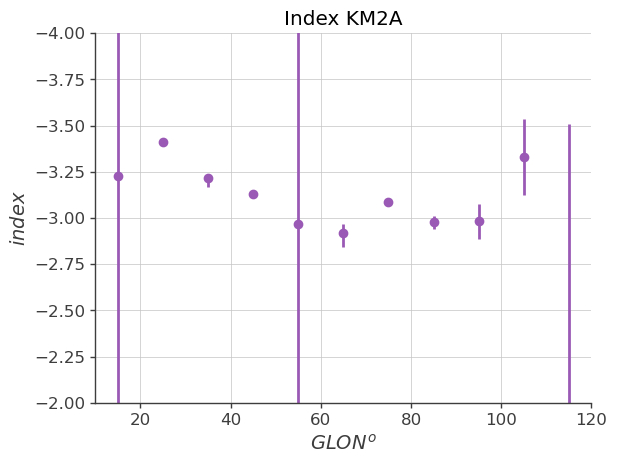

In [6]:
plt.figure() #figsize=(10,10)

plt.errorbar(gc, di, [die, diep], fmt="o")
plt.ylim(-2,-4)
plt.title("Index KM2A")
plt.ylabel(r"$index$")
plt.xlabel(r"$GLON^{o}$")
plt.grid()